In [ ]:
#
# hw5pr1births_modeler:  birth classification model-building 
#
# the relationship:  using features month + day, how well can we predict "birth-popularity" 
#
#     to keep this as _classification_, we will use the binary above/below median as the target (the median is 190942)
#

### <font color="DodgerBlue">hw5pr1 births modeler</font>

Suggestion:
+ set up this file and the example iris_modeler file side-by-side...
+ for each iris_modeler cell, copy it over..
   + edit it and make adjustments to suit the births problem (as needed)
   + run it to make sure it all works!

And, by the end, you'll have experienced the full ML/data modeling workflow (for classification, at least)
+ Running through this workflow by hand is a great way to digest the process...
+ hw5pr2 will ask you to do this again, with the digits
+ hw5ec is for another - optional - example, using your own dataset or, possibly, regression 



### <font color="Coral">Final, _big-picture_ question</font>   
+ Which phenomenon, iris-species or birthday-popularity, is more "modelable"?
+ ... at least, as far as these two datasets are concerned?!

Note that you might want to wait until _after_ modeling the births data to answer this...

<hr>

Below ... after finishing the model-building ... share your thoughts on which (irises/births) is more "modelable" and why ...

<br><br>

## Modeling birthdays

Remember: Be sure to **drop** the column with the official birth numbers.

The goal is to model whether a birthday is above-average or below-average in popularity, based on two features: <tt>month</tt> and <tt>day</tt>

In [ ]:
#
# SUGGESTION:  
# 
#       +++ copy-paste-and-alter from the iris-modeling notebook to here +++
#
# This approach has the advantage of more deeply "digesting" the iris workflow...
#      ...altering the parts that don't transfer, and taking the parts that do
#

#
# WARNING:    Be _sure_ to remove the "births" column.    (It allows the modeling to "cheat"...)
#           

In [ ]:
# You'll insert (or copy-paste-edit) lots of cells!

In [1]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)
import sklearn

In [2]:
# let's read in our flower data...
# 
COLUMN =1
cleaned_filename = "births_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{cleaned_filename} : file read into a pandas dataframe.")
df_model1 = df_tidy.drop('births', axis=COLUMN)
df_model1 = df_model1.drop('above/below median', axis=COLUMN)
df_model1


births_cleaned.csv : file read into a pandas dataframe.


,month,day,birthnum
0,1,1,1
1,1,2,1
2,1,3,1
3,1,4,1
4,1,5,1
...,...,...,...
361,12,27,0
362,12,28,0
363,12,29,0
364,12,30,0


In [3]:
df_model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   month     366 non-null    int64
 1   day       366 non-null    int64
 2   birthnum  366 non-null    int64
dtypes: int64(3)
memory usage: 8.7 KB


In [4]:
#
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place 
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

SPECIES = ['above','below']   # int to str
SPECIES_INDEX = {'above':0,'below':1}  # str to int

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {SPECIES_INDEX[name]}")

COLUMNS is Index(['month', 'day', 'birthnum'], dtype='object')

COLUMNS[0] is month

COL_INDEX is {'month': 0, 'day': 1, 'birthnum': 2}


above maps to 0
below maps to 1


In [5]:
A = df_model1.to_numpy()    # yields the underlying numpy array
print(A)


[[ 1  1  1]
 [ 1  2  1]
 [ 1  3  1]
 ...
 [12 29  0]
 [12 30  0]
 [12 31  0]]


In [6]:

#
# let's make sure it's all floating-point, so we can multiply and divide
#
#       this is not needed here, but it can be important if some features are integer and floating point is needed


A = A.astype('float64')  # so many numpy types!   Here is a list:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A)


[[ 1.  1.  1.]
 [ 1.  2.  1.]
 [ 1.  3.  1.]
 ...
 [12. 29.  0.]
 [12. 30.  0.]
 [12. 31.  0.]]


In [7]:
#
# Also, nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 366 rows and 3 cols


In [8]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

#
# Watch out!  Between datasets, this cell is one that often needs to be carefully changed...
#

X_all = A[:,0:2]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,2]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/species)   are all here: \n {y_all}")
print()
print(f"X_all (just the features, 5 rows worth) are \n {X_all[0:5]}")


+++ Start of data definitions +++

y_all (just the labels/species)   are all here: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.

In [9]:
#
# we scramble the data, to remove (potential) dependence on the data ordering:
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_labeled = X_all[indices]              # we apply the _same_ permutation to each!
y_labeled = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_labeled}")
print()
print(f"The corresponding data rows are \n {X_labeled}")


The scrambled labels/species are 
 [0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 

In [10]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data at all when building the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    To do so, let's define TEST_PERCENT as 0.2
#

TEST_PERCENT = 0.2

from sklearn.model_selection import train_test_split      # this function splits into training + testing sets

# Here we create four numpy arrays:
#    X_train are a 2d array of features and observations for training
#    y_train are a single-column of the correct species for X_train (that's how it trains!)
#
#    X_test are a 2d array of features and observations for testing (unseen during training)
#    y_test are a single-column of the correct species for X_test (so we can measure how well the testing goes...) 

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=TEST_PERCENT)  # random_state=42

# Done!  Let's confirm these match our intution:

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)} rows)")
print(f"y_test: {y_test}")
print(f"X_test (first few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)} rows)")
print(f"y_train: {y_train}")
print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

training with 292 rows;  testing with 74 rows

Held-out data... (testing data: 74 rows)
y_test: [0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1.]
X_test (first few rows): [[ 7. 24.]
 [12. 20.]
 [11. 30.]
 [ 8.  2.]
 [ 7.  5.]]

Data used for modeling... (training data: 292 rows)
y_train: [1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0

In [11]:
# K =84 model, not reliable

#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a kNN model and train it! 
#
from sklearn.neighbors import KNeighborsClassifier

k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)

knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN

# we train the model ... it's one line!
knn_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a knn classifier with k =", k)  

Created and trained a knn classifier with k = 84


In [12]:
#
# +++ This cell is our "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = knn_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0.]
Actual  labels  : [0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1.]

Results on test set:  52 correct out of 74 total.


In [13]:
#
# Let's print things in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')   
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)


row   # :    predicted actual         result
row   0 :        above above          
row   1 :        above above          
row   2 :        above below          incorrect
row   3 :        above above          
row   4 :        above below          incorrect
row   5 :        above below          incorrect
row   6 :        above above          
row   7 :        above above          
row   8 :        above above          
row   9 :        below below          
row  10 :        below below          
row  11 :        above above          
row  12 :        above above          
row  13 :        above below          incorrect
row  14 :        above below          incorrect
row  15 :        above below          incorrect
row  16 :        above above          
row  17 :        above above          
row  18 :        below below          
row  19 :        above above          
row  20 :        above below          incorrect
row  21 :        above below          incorrect
row  22 :        above b

52

In [14]:
#
# Ok!  We have our knn model, let's use it...
#
# ... in a data-trained predictive model (k-nearest-neighbors), using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"
#
def predictive_model( Features ):
    """ input: a list of mon/day
                
        output: the predicted above/below, from
                  
    """
    our_features = np.asarray([Features])                      # extra brackets needed so it's 2d
    predicted_species_list = knn_model.predict(our_features)   # PREDICT!

    predicted_species = int(round(predicted_species_list[0]))  # unpack the one element it contains
    name = SPECIES[predicted_species]                          # look up the species
    return name        
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
ListofFeatures = [ 
[10,4.2],
[1.5,1.5],
[2,-1],
[-10,0],
[0,0],
[2,32],
[9.2,6.5],
[3.14159,2.71828],
[42,42]]         

for Features in ListofFeatures:
    result = predictive_model( Features )
    print(f"From the Features {Features}, I predict {result}")

From the Features [10, 4.2], I predict above
From the Features [1.5, 1.5], I predict below
From the Features [2, -1], I predict below
From the Features [-10, 0], I predict below
From the Features [0, 0], I predict below
From the Features [2, 32], I predict below
From the Features [9.2, 6.5], I predict above
From the Features [3.14159, 2.71828], I predict above
From the Features [42, 42], I predict above


In [15]:
#
# Here, we use "cross validation" to find the "best" k...
#

import time
from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#
all_accuracies = []
best_k = 84  # Not correct!
best_accuracy = 0.0  # also not correct...

# Note that we are cross-validating using only our TEST data!
for k in range(1,85):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build a knn_model for every k
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function 
    print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")

    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_k = k                        # with the best k

    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!

    
# use best_k!
print(f"best_k = {best_k}   yields the highest average cv accuracy: {best_accuracy}")  # print the best one


k:  1  cv accuracy:  0.7981
k:  2  cv accuracy:  0.7775
k:  3  cv accuracy:  0.8359
k:  4  cv accuracy:  0.8187
k:  5  cv accuracy:  0.8494
k:  6  cv accuracy:  0.8220
k:  7  cv accuracy:  0.8494
k:  8  cv accuracy:  0.8323
k:  9  cv accuracy:  0.8461
k: 10  cv accuracy:  0.8358
k: 11  cv accuracy:  0.8461
k: 12  cv accuracy:  0.8494
k: 13  cv accuracy:  0.8529
k: 14  cv accuracy:  0.8528
k: 15  cv accuracy:  0.8494
k: 16  cv accuracy:  0.8324
k: 17  cv accuracy:  0.8359
k: 18  cv accuracy:  0.8392
k: 19  cv accuracy:  0.8290
k: 20  cv accuracy:  0.8222
k: 21  cv accuracy:  0.8325
k: 22  cv accuracy:  0.8221
k: 23  cv accuracy:  0.8255
k: 24  cv accuracy:  0.8152
k: 25  cv accuracy:  0.8255
k: 26  cv accuracy:  0.8152
k: 27  cv accuracy:  0.8220
k: 28  cv accuracy:  0.8118
k: 29  cv accuracy:  0.8118
k: 30  cv accuracy:  0.8050
k: 31  cv accuracy:  0.8186
k: 32  cv accuracy:  0.8015
k: 33  cv accuracy:  0.8117
k: 34  cv accuracy:  0.8152
k: 35  cv accuracy:  0.8084
k: 36  cv accuracy: 

<Axes: xlabel='k_value', ylabel='accuracy'>

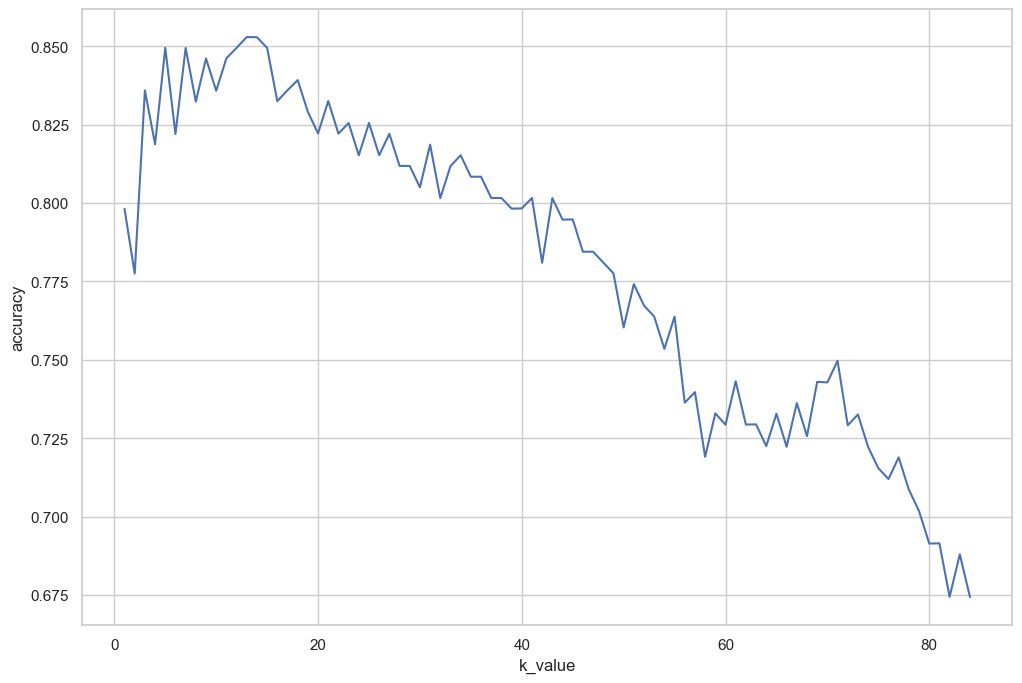

In [16]:
### Let's see all the accuracies!

import pandas as pd

# Let's create a new pandas dataframe using the data from the above cell
crossvalidation_df = pd.DataFrame( {"k_value":np.asarray(range(1,84+1)),
                                    "accuracy":np.asarray(all_accuracies)}
                                    )

import seaborn as sns
sns.set_theme(style="whitegrid", rc = {'figure.figsize':(12,8)})  # other options: darkgrid, whitegrid, dark, white, ticks
sns.lineplot(x="k_value", y="accuracy", data=crossvalidation_df)

In [17]:
#
# With the best k, we build and train a new model:
#
# Now using best_k instead of the original, randomly-guessed value:   
#
best_k = best_k   # not needed, but nice to remind ourselves of the variable name
from sklearn.neighbors import KNeighborsClassifier
knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k!

# we train the model (one line!)
knn_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Created + trained a knn classifier, now tuned with a (best) k of {best_k}")  

# How does it do?!  The next cell will show...

Created + trained a knn classifier, now tuned with a (best) k of 13


In [18]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = knn_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)

# And, the overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.\n\n")

# Plus, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 1.]
Actual labels: [0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1.]

Results on test set:  61 correct out of 74 total.



row   # :    predicted actual         result
row   0 :        above above          
row   1 :        above above          
row   2 :        above below          incorrect
row   3 :        above above          
row   4 :        above below          incorrect
row   5 :        below below          
row   6 :        above above          
row   7 :        above above          
row   8 :        below above          incorrect
row   9 :        below below        

61

In [ ]:
# indeed better than 84,
# with 84, it only got 52 correct

In [19]:
#
# Ok!  We tuned our knn modeling to use the "best" value of k...
#
# And, we should now use ALL available data to train our final predictive model:
#
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)     # here, we use the best_k
knn_model_final.fit(X_all, y_all)                              # KEY DIFFERENCE:  we use ALL the data!
print(f"Created + trained a 'final' knn classifier, with a (best) k of {best_k}") 

Created + trained a 'final' knn classifier, with a (best) k of 13


In [20]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features, Model ):                 # to allow the input of any Model
    """ input: a list of mon/day
                
        output: the predicted above/below, from
                  
    """
    our_features = np.asarray([Features])                 # extra brackets needed for 2d
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species
   
#
# Try it!
# 

LoF = [
[1,2],
[2,28],
[2,29],
[8,15]

]

# run on each one:
for Features in LoF:
    predicted_species = predictive_model( Features, knn_model_final )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"I predict {name} from the features {Features}")    # Answers in the assignment...

I predict below from the features [1, 2]
I predict below from the features [2, 28]
I predict below from the features [2, 29]
I predict above from the features [8, 15]


### Congrats!

You've created a birthday-popularity modeler!

The rest of the hw - and the rest of our ML module - is to run more ML workflows:   
+ for different datasets:  &nbsp; (2) Digits, (ec) your own data, or Titanic, or Housing, or ...
+ and, starting next time, for different algorithms: &nbsp; decision trees and random forests, then nnets, ...

### Remember to answer the "which dataset is more modelable?" question: _births_ or _irises_ ?  

It's here:

<br>

### <font color="Coral">Final, _big-picture_ question</font>  
+ Which phenomenon, iris-species or birthday-popularity, is more "modelable"?
+ ... at least, as far as these two datasets are concerned?!

Note that you might want to wait until _after_ modeling the births data to answer this...

<hr>



Here, share your thoughts on which (irises/births) is more "modelable" and why:

<br><br>
<br><br>

iris has accuracy of 27/29 =93%

birthday has accuracy of 61/74 = 82%

seems like iris is more accurate

Theoretically, iris should be more modelable because the input is continuous and the output is categorical

Birthday is just a tad behind because the input is also categorical